In [1]:
import os

import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join as oj
from collections import defaultdict
import dvu

from sklearn.cluster import SpectralBiclustering

from simulations_util import get_best_fit_line, get_feat_cooccurence, print_tree, get_feat_counts_cossim
from simulations_util import get_split_feats_counts, get_feat_counts_matrix

In [2]:
mpl.rcParams['grid.linewidth'] = 2.5
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams["figure.figsize"] = [8, 6]
plt.rcParams['figure.facecolor'] = 'white'
cs = {
    'FIGS+': 'black',
    'FIGS': 'blue',
    'CART': 'orange',
    'RF': "grey",
    "XGB": "pink",
    "GAM": "green"
}

label_size = 14
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
mpl.rcParams['axes.labelsize'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['figure.titlesize'] = label_size

mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

fig_path = "results/figs/"

In [3]:
# n_train = [100, 250, 500, 750, 1000, 1500]
n_train = np.ceil(np.geomspace(100, 2500, 8)).astype(int)

## 1. Results for LSS

In [4]:
sim_name = "LSS"
(scores, error_bar) = pkl.load(open(oj('results/', "LSS", 'scores.pkl'), 'rb'))
best_fits = defaultdict(list)
for k in scores.keys():
    best_fits[k].append(get_best_fit_line(np.log(n_train), np.log(scores[k])))

In [6]:
best_fits

defaultdict(list,
            {'GAM': [[-0.019147232842134616, -0.5157118293837958]],
             'CART': [[-0.23426060766134588, 0.9417226517987494]],
             'RF': [[-0.3285613923126412, 0.9745100450974176]],
             'FIGS': [[-1.4527836900905589, 7.060150417794011]],
             'FIGS+': [[-1.4661459200463656, 7.14373228318338]],
             'XGB': [[-0.6838859765265942, 2.883349046922559]]})

FileNotFoundError: [Errno 2] No such file or directory: 'results/figs/LSS_error_curves.png'

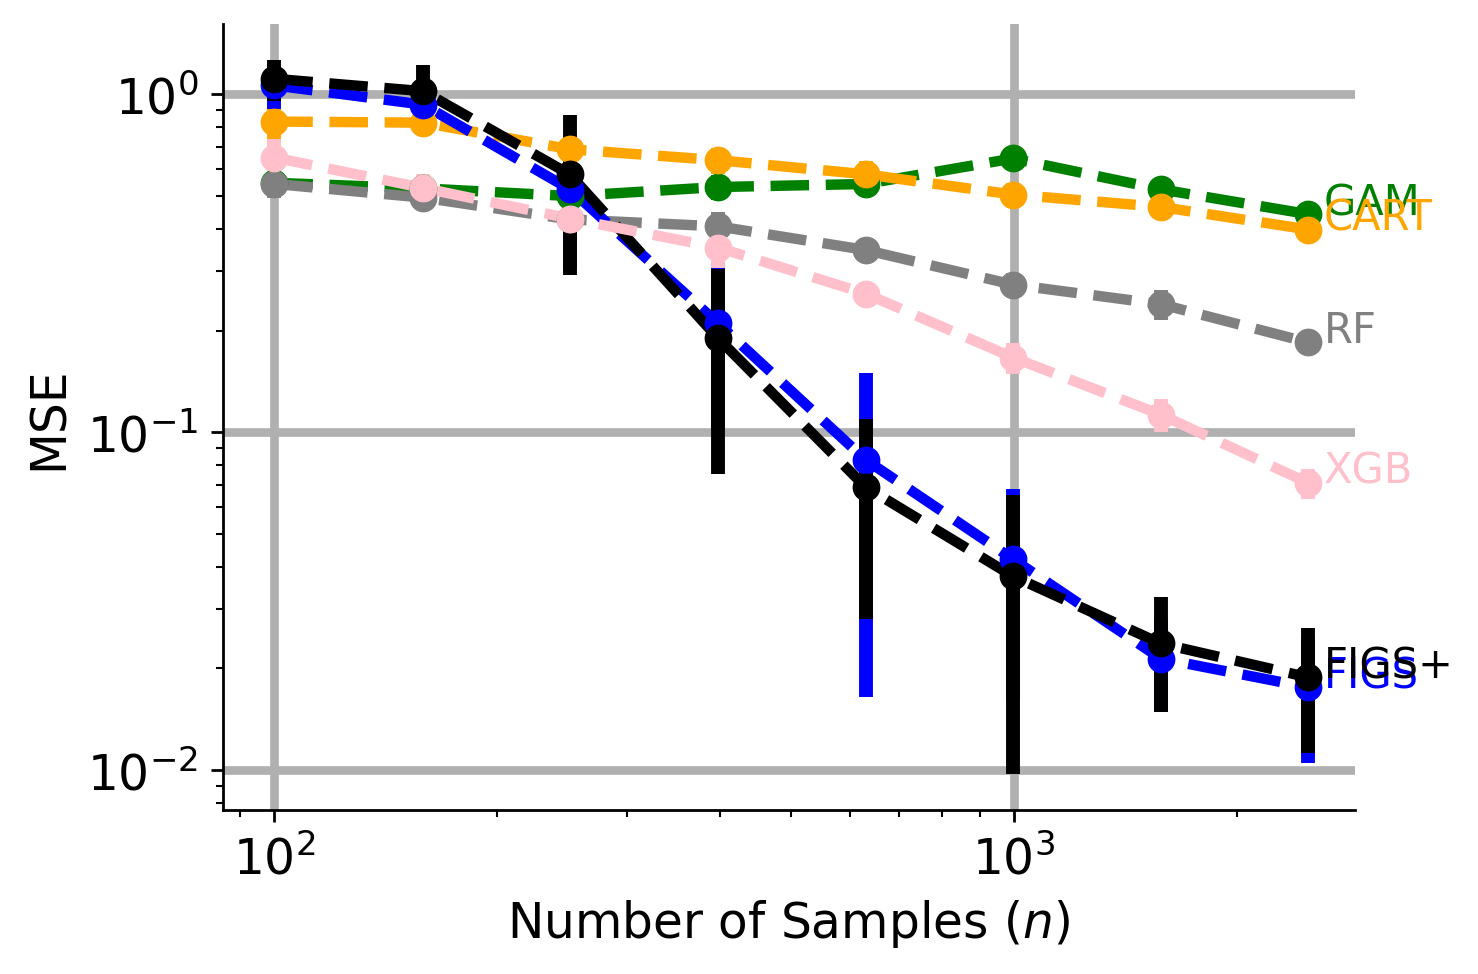

In [7]:
fig = plt.figure(figsize = (6, 4))

for k in scores.keys():
    kwargs = dict(color=cs[k], ms=7, elinewidth=4, lw=3)
   # slope = best_fits[k][0][0]
   # axs[0].errorbar(n_train, np.exp(slope * np.log(n_train) + best_fits[k][0][1]), linestyle = '--', **kwargs)
    plt.errorbar(n_train, scores[k], yerr=error_bar[k], fmt='o', **kwargs)
    plt.plot(n_train, scores[k], linestyle = '--', label=k, color=cs[k], lw=3)

#plt.legend(loc='best') #, labelcolor='linecolor')
plt.xlabel('Number of Samples ($n$)') #, fontsize=25)
plt.xscale('log')
plt.yscale('log')
#     plt.set_title(titles[i])
plt.grid()
plt.yticks([0.1, 0.2, 0.5, 1.0])
plt.ylabel('MSE')

plt.tight_layout(pad=0.4,w_pad=0.5, h_pad=1.5)
plt.yscale('log')
plt.xscale('log')
labels = [r'$2 \times \mathregular{10^{-1}}$', r'$5 \times \mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$',r'$3 \times \mathregular{10^{0}}$']
dvu.line_legend(fontsize=12, xoffset_spacing=0.05, adjust_text_labels=False)

# plt.yticks(ytick, labels)
#viz.savefig(f'err_rate_{num}')
plt.savefig(fig_path + "LSS_error_curves")
plt.show()